In [85]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv(r"C:\Users\osame\OneDrive\Desktop\elevvo\assigment1\StudentPerformanceFactors.csv")

data understanding

In [87]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

data visualization

In [89]:
numeric_cols = df.select_dtypes(include='int64').columns
numeric_cols = numeric_cols.drop('Exam_Score')
cat_cols = df.select_dtypes(include='object').columns
cat_cols = cat_cols.drop('Gender')

In [90]:
numeric_cols

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')

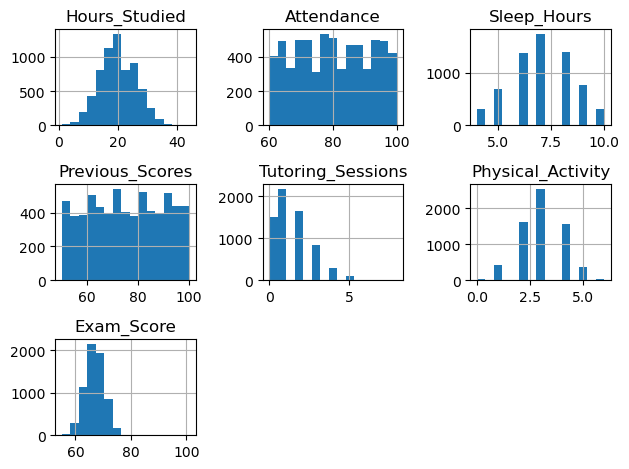

In [91]:
df.hist(bins = 15)
plt.tight_layout()
plt.show()

In [92]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


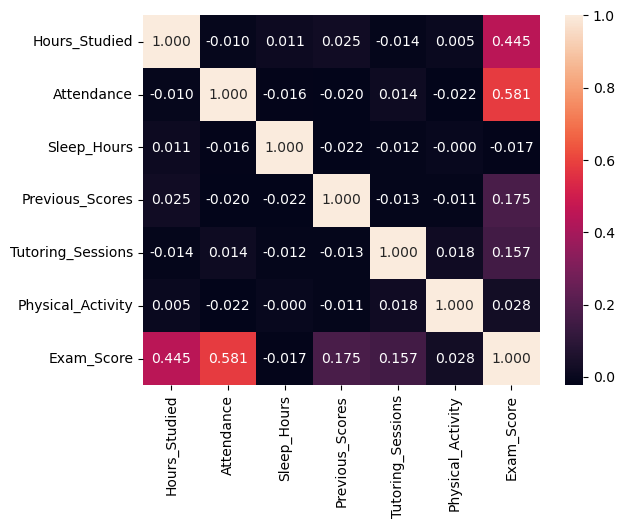

In [93]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation,cbar=True,fmt='.3f',annot=True)
plt.show()

correlation with target column strong/weak relationship with target

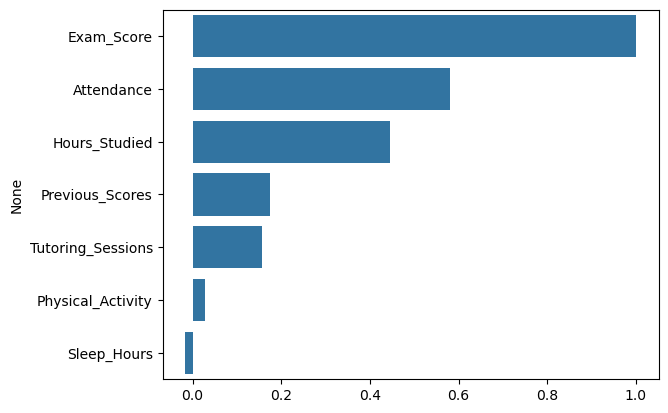

In [94]:
correlation = df.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)
sns.barplot(x = correlation.values,y=correlation.index)
plt.show()

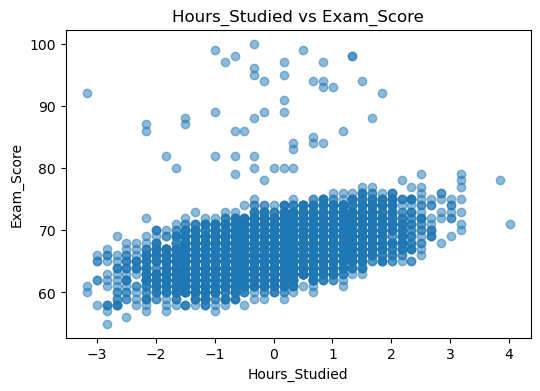

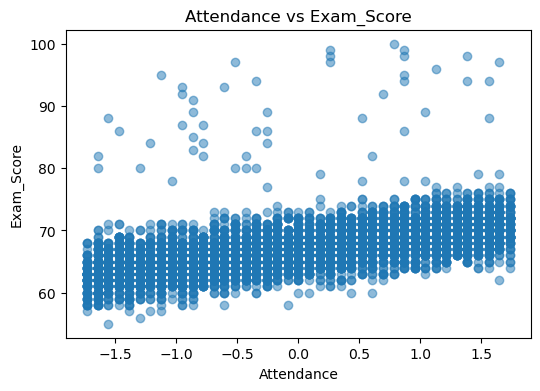

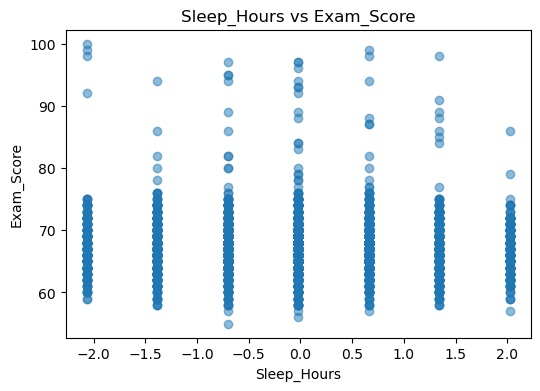

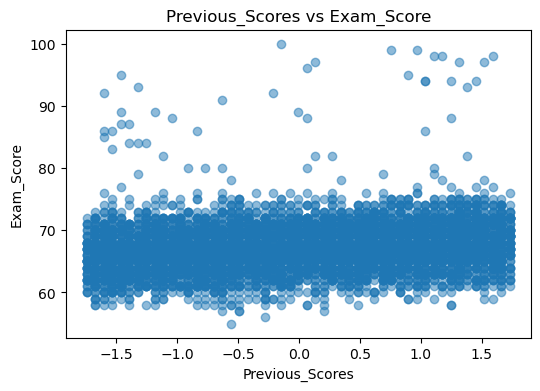

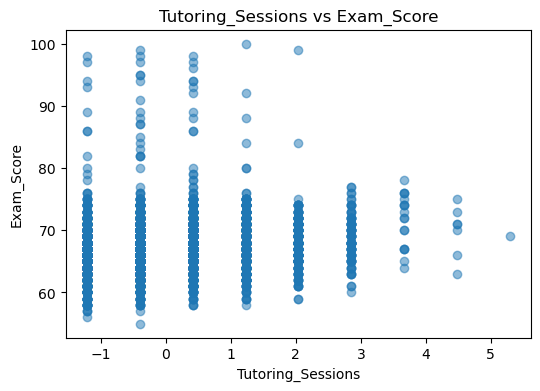

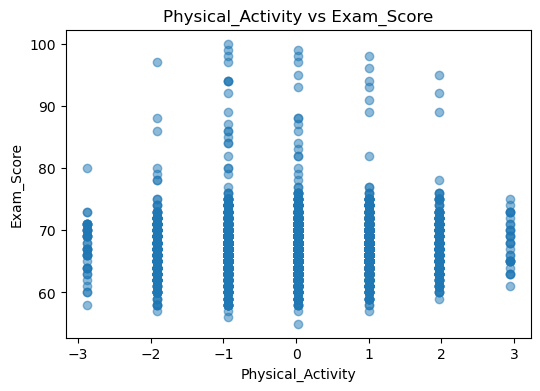

In [ ]:
target = "Exam_Score"

for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        plt.scatter(df[col], df[target], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
        plt.show()

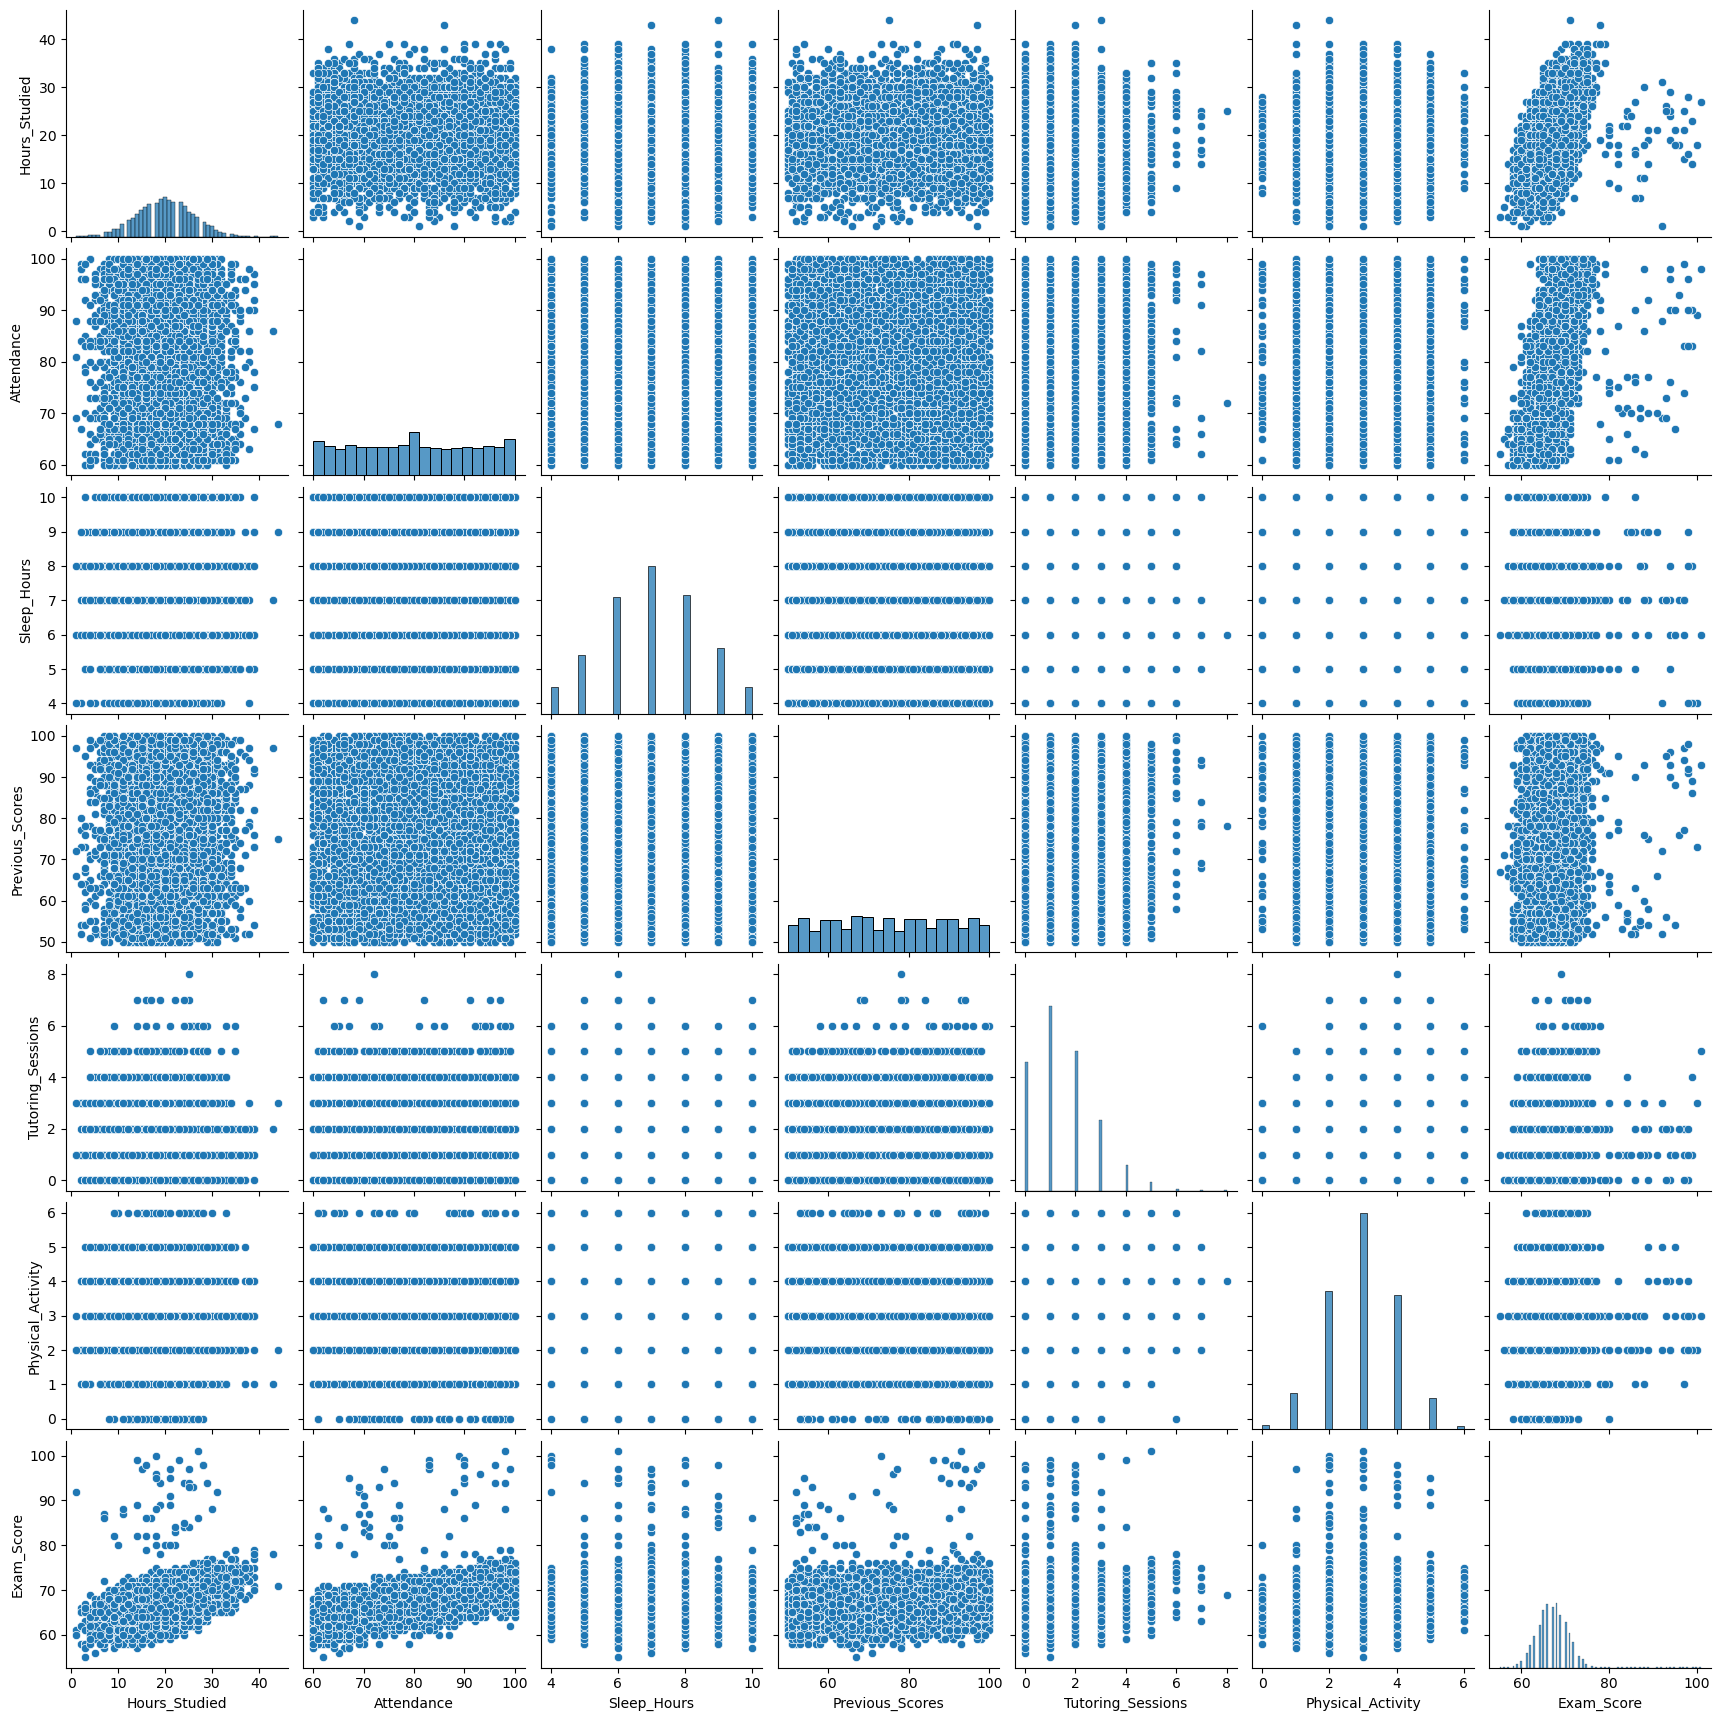

In [95]:
sns.pairplot(df)

In [96]:
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home'],
      dtype='object')

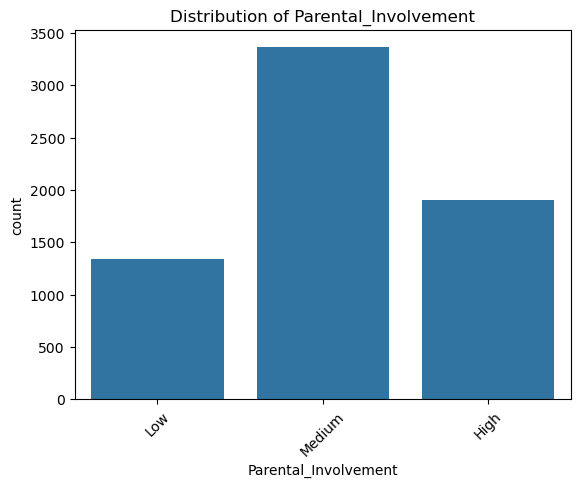

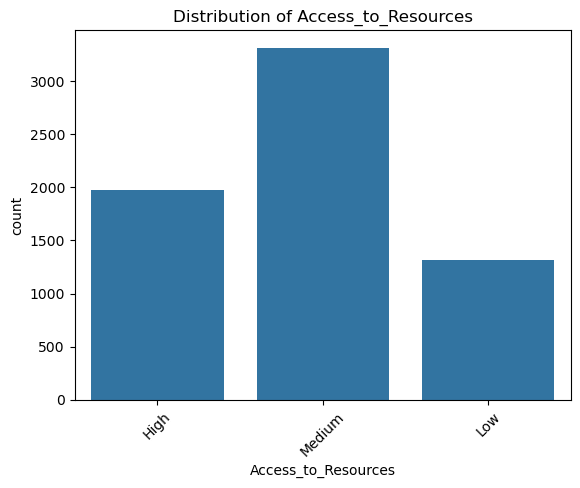

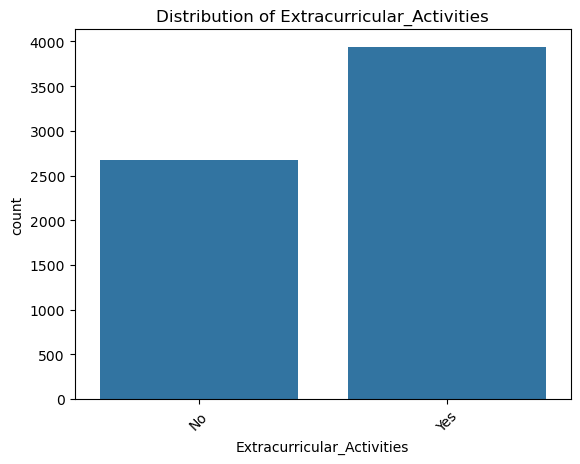

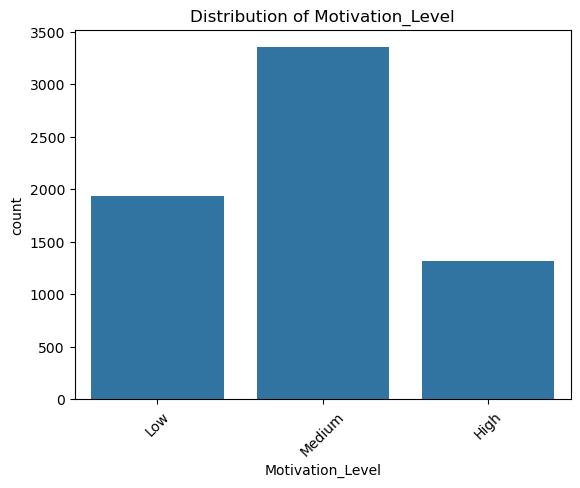

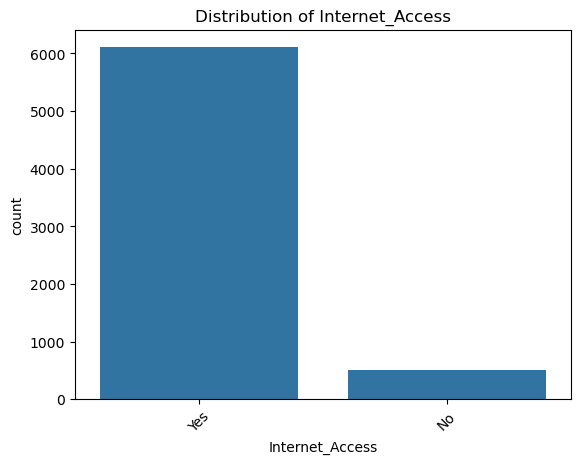

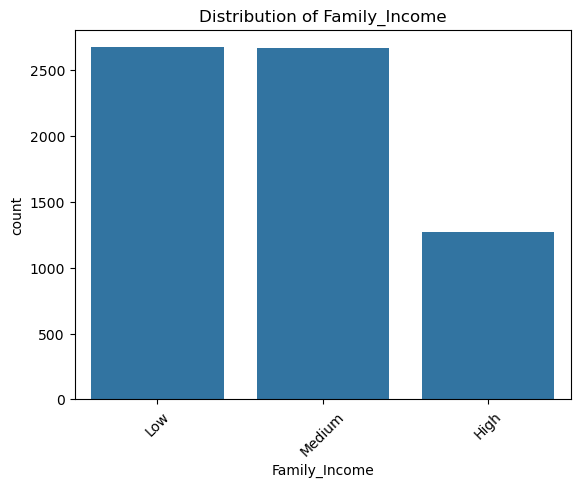

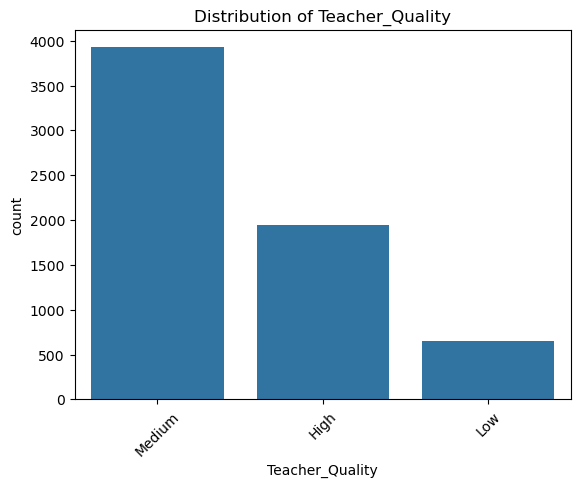

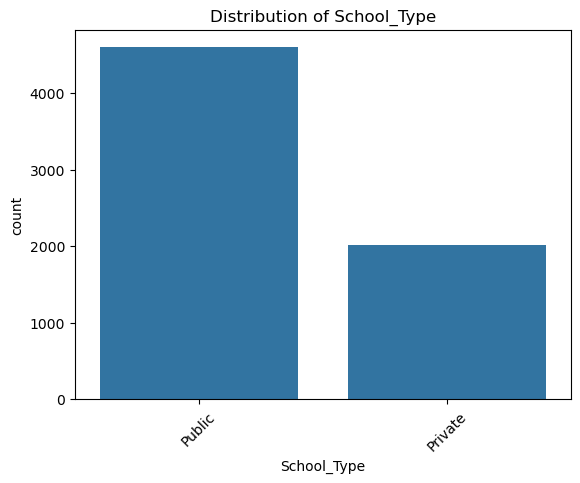

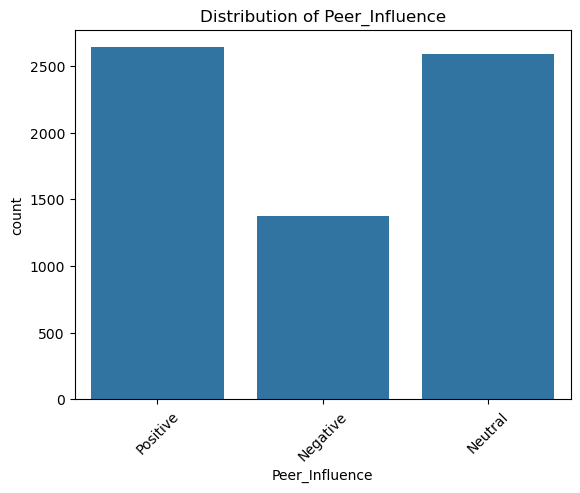

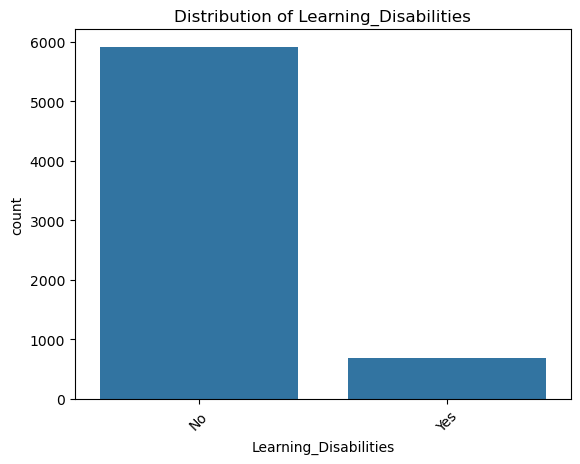

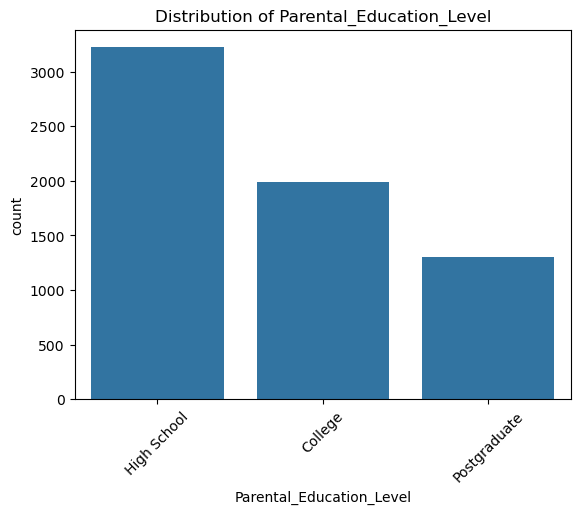

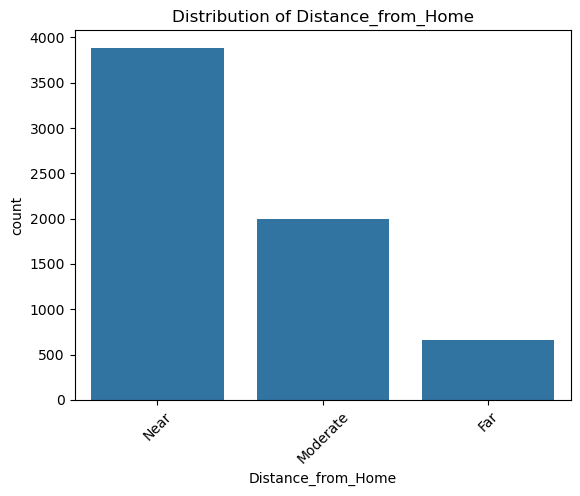

In [97]:
for col in cat_cols:
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

preprossing/data cleaning

In [98]:
df.drop(columns=['Gender'],axis=1,inplace=True)

In [99]:
df.duplicated().sum()

0

In [100]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Exam_Score                     0
dtype: int64

drop row if it has more than 2 nulls

In [101]:
df = df[df.isnull().sum(axis=1)<=2]

impute nulls

In [102]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0],inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0],inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0],inplace=True)

In [103]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Exam_Score                    0
dtype: int64

In [104]:
df = df[df['Exam_Score']<=100]

In [105]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,68


encoding

In [106]:
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home'],
      dtype='object')

In [107]:
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)

feature scalling

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [109]:
df['Exam_Score']

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6606, dtype: int64

train_test_split

In [110]:
from sklearn.model_selection import train_test_split
x=df.drop(['Exam_Score'],axis=1)
y=df['Exam_Score']

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

using linear regression

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(y_test,y_pred))

1.463883917051564
0.8342685991896143


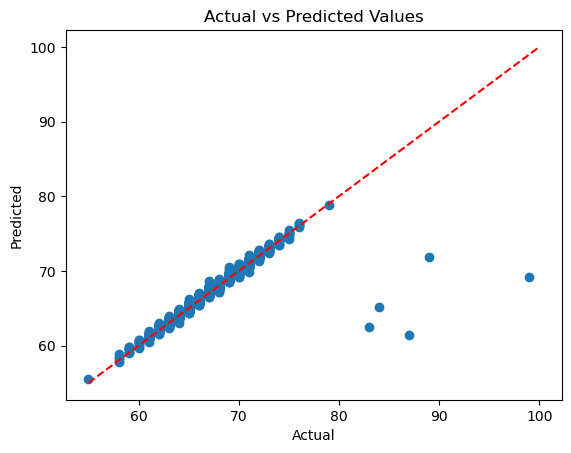

In [114]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()

graph illustrating features affecting target the most       highest-> increases target the most

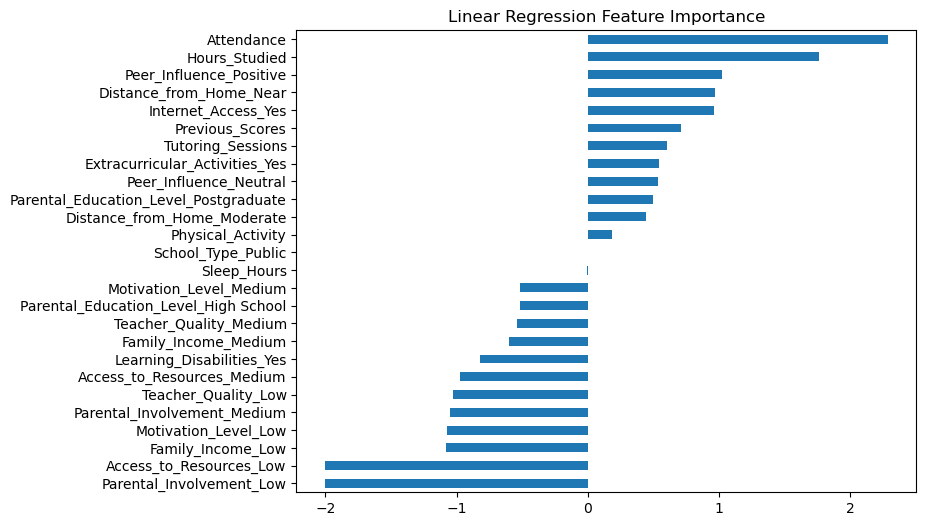

In [115]:
importance = pd.Series(lr.coef_, index=x.columns)
importance.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Linear Regression Feature Importance')
plt.show()

permutation (measures feature importance)

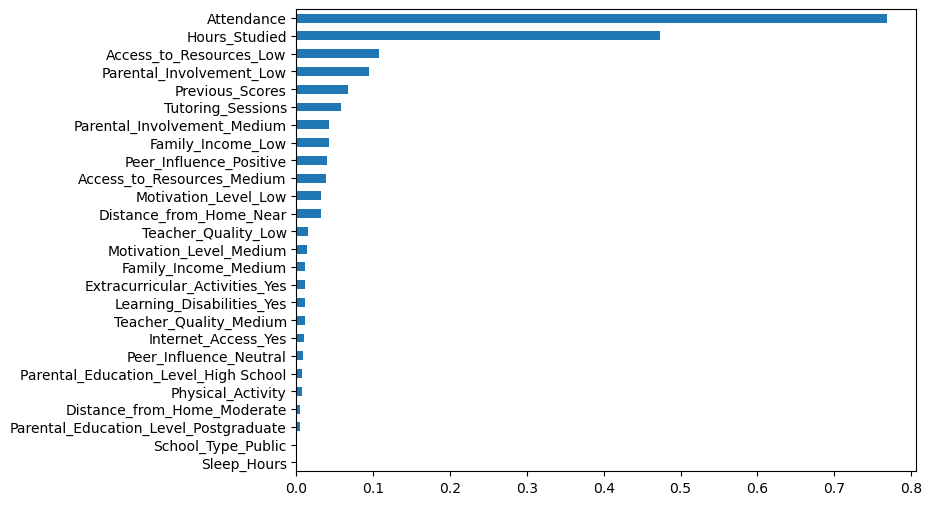

In [116]:
from sklearn.inspection import permutation_importance

result = permutation_importance(lr, x_test, y_test, n_repeats=10, random_state=4)
importance = pd.Series(result.importances_mean,index=x.columns)
importance.sort_values().plot(kind='barh',figsize=(8,6))
plt.show()

there is even better ;)?

grouping of subsets to drop low permutation columns

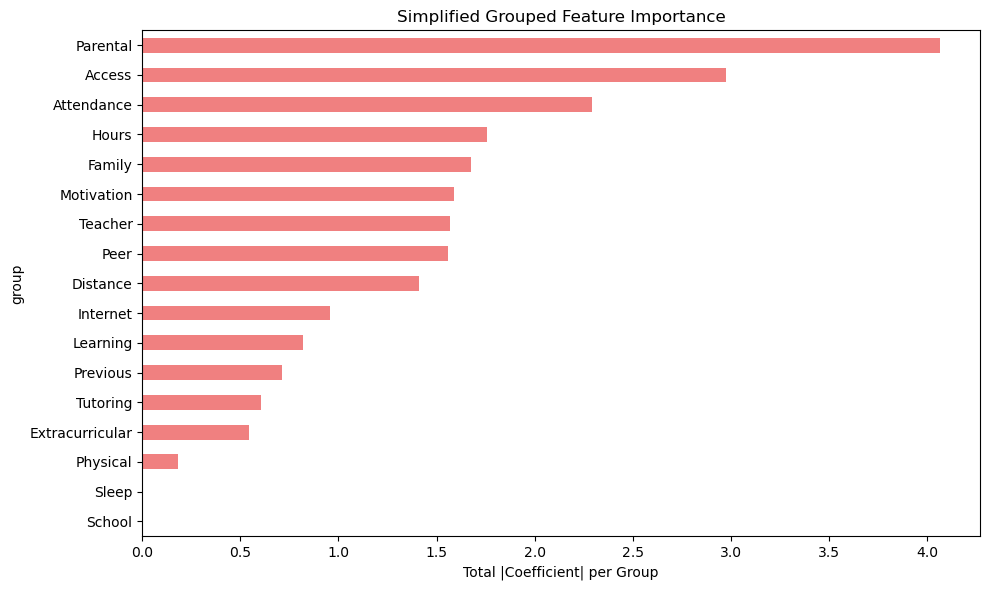

In [117]:
importance = pd.Series(lr.coef_, index=x.columns)

group_names = [col.split('_')[0] for col in x.columns]
importance_df = pd.DataFrame({'group': group_names, 'importance': importance.abs()})


grouped_importance = importance_df.groupby('group')['importance'].sum().sort_values()

grouped_importance.plot(kind='barh', figsize=(10, 6), color='lightcoral')
plt.title('Simplified Grouped Feature Importance')
plt.xlabel('Total |Coefficient| per Group')
plt.tight_layout()
plt.show()

In [118]:
# Low importance groups you want to drop
drop_groups = ['School','Sleep','Physical']

# Find all columns belonging to those groups
drop_columns = []
for col in x.columns:
    if col.split('_')[0] in drop_groups:
        drop_columns.append(col)

df_encoded_cleaned = df.drop(columns=drop_columns)

In [119]:
y = df_encoded_cleaned['Exam_Score']
z = df_encoded_cleaned.drop(columns=['Exam_Score'],axis=1)
model = LinearRegression()
model.fit(z, y)
X_train,X_test,Y_train,Y_test = train_test_split(z,y,test_size=0.2,random_state=4)

Y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(Y_test,Y_pred))

1.4749070717595572
0.8317632623501935


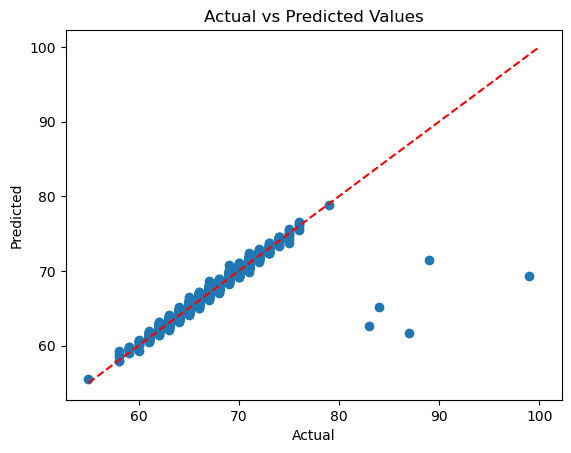

In [120]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()

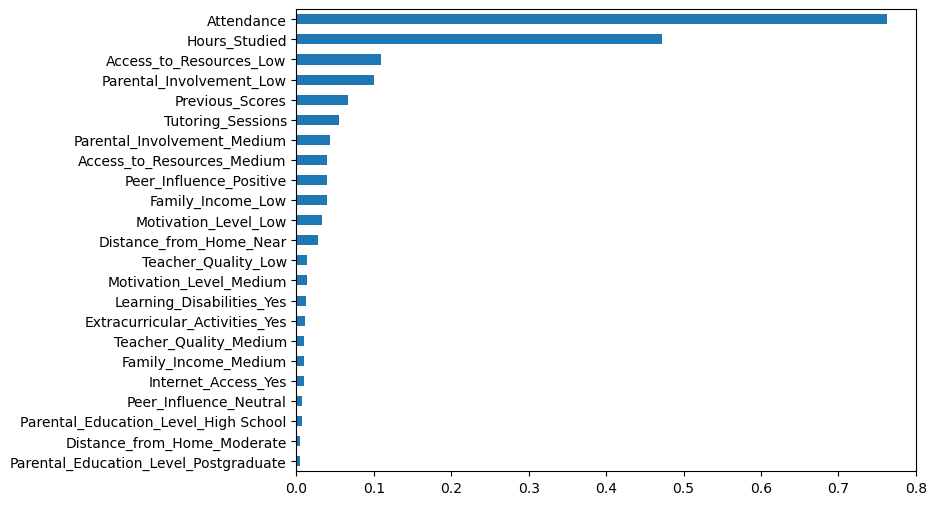

In [121]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, Y_test, n_repeats=10, random_state=5)
importance = pd.Series(result.importances_mean,index=z.columns)
importance.sort_values().plot(kind='barh',figsize=(8,6))
plt.show()

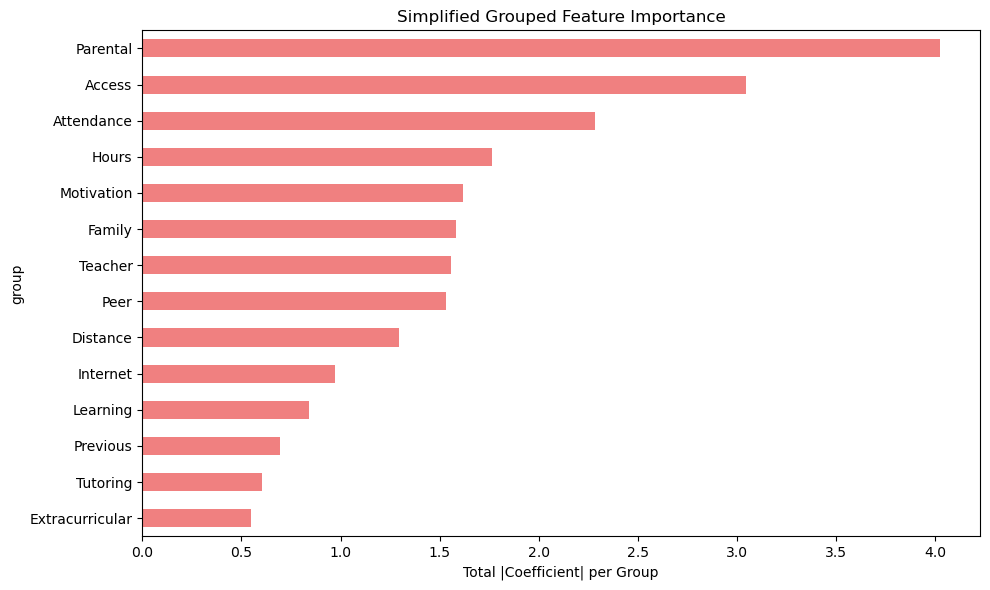

In [122]:
importance = pd.Series(model.coef_, index=z.columns)

group_names = [col.split('_')[0] for col in z.columns]
importance_df = pd.DataFrame({'group': group_names, 'importance': importance.abs()})


grouped_importance = importance_df.groupby('group')['importance'].sum().sort_values()

grouped_importance.plot(kind='barh', figsize=(10, 6), color='lightcoral')
plt.title('Simplified Grouped Feature Importance')
plt.xlabel('Total |Coefficient| per Group')
plt.tight_layout()
plt.show()

i chose ridge regularization bec we have correlated data and the features are likely to contribute to the prediction

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.005)
ridge.fit(X_train,Y_train)
yr_pred = ridge.predict(X_test)
mse=mean_squared_error(Y_test,yr_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(Y_test,yr_pred))

1.4826686584415152
0.8299879371895065


sadly after dropping columns to reduce noise for the ridge the errors stayed the same

trying polynomialfeatures

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
lin = LinearRegression()
lin.fit(x_train_poly,y_train)
y_poly_pred = lin.predict(x_test_poly)
mse=mean_squared_error(Y_test,y_poly_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(Y_test,y_poly_pred))

1.5387788118094117
0.8168765686093833


according to the data distrubtion it is clear that linear regression would give a better result than polynomial regression!